Df: 499
Manually Calculated Dependent Samples T-value= -0.3383
P-value =  0.7352852738654214

Scipy Dependent T-value:  -0.3383
p = 0.7352852738654216
The mean difference was NOT significantly different to that predicted under the null hypothesis, p <= 0.05


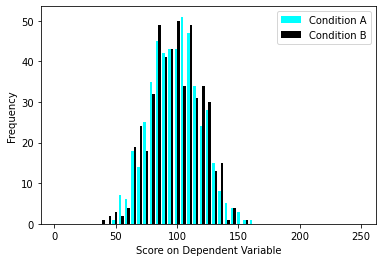

R-squared = 0.0


In [1]:
# calculating a Dependent Samples T-Test:

import statistics as stats
import numpy as np
import scipy
import scipy.stats
import pandas as pd
import math
import matplotlib.pyplot as plt

# EITHER generating random samples from populations with different means, OR generating samples from the same population

data1 = []
data2 = []

coin = ['Heads', 'Tails']

coin_flip = np.random.choice(coin)

if coin_flip == 'Heads':
    for i in range(500):
        data1.append(round(20*np.random.randn() + 100))
        data2.append(round(20*np.random.randn() + 100))
    
if coin_flip == 'Tails':
    for i in range(500):
        data1.append(round(20*np.random.randn() + 100))
        data2.append(round(20*np.random.randn() + 150))

df = []
n = []

# finding sample size and degrees of freedom:

if len(data1) == len(data2):
    df = len(data1)-1
    n = len(data1)
    
# calculating differences between paired scores:

diff = []

count = 0
for i in data2:
    diff.append(i - data1[count])
    count = count + 1
    
# calculating the mean difference score and the variance of the difference scores:
    
mean_diff = stats.mean(diff)

count = 0
squared_dev_diff = []
for i in diff:
    squared_dev_diff.append((i - mean_diff)*(i - mean_diff))
    count = count + 1

sum_squared_dev_diff = sum(squared_dev_diff)
    
var_diff = sum_squared_dev_diff/df

# calculating the standard error of the difference scores:

std_err_diff = math.sqrt(var_diff/n)

# calculating the dependent samples t statistic:

dependent_t = mean_diff/std_err_diff

print('Df:', df) 
print('Manually Calculated Dependent Samples T-value=', round(dependent_t, 4))
print('P-value = ', 2* (1 - scipy.stats.t.cdf(x = abs(dependent_t), df = df)))


# comparing the t statistic result to scipy.stats.ttest_rel result:

scipy_ttest_rel = scipy.stats.ttest_rel(data2, data1)

print('\nScipy Dependent T-value: ', round(scipy_ttest_rel[0], 4))
print('p =', scipy_ttest_rel[1])


# using the scipy t test to get p-value:
      
if (scipy_ttest_rel[1]) <= 0.05:
    print('The mean difference was significantly different to that predicted under the null hypothesis, p <= 0.05')
else:
      print('The mean difference was NOT significantly different to that predicted under the null hypothesis, p <= 0.05')
        
# creating a histogram of the data

bins = np.linspace(1,250)

plt.hist([data1, data2], bins, color = ['cyan','black'], label = ['Condition A', 'Condition B'])
plt.xlabel("Score on Dependent Variable")

plt.ylabel("Frequency")

plt.legend(loc='upper right')

plt.show()

# calculating effect size

r_squared = dependent_t**2/(dependent_t**2 + df)

print('R-squared =', round(r_squared,2))